# Heart Disease Classification Model

This notebook demonstrates the process of building a classification model to predict heart disease using a dataset. The workflow includes data collection, cleaning, splitting, training, and evaluating the model.

## 1. Importing Libraries

We'll start by importing the necessary libraries for data manipulation, machine learning, and visualization.

In [1]:
import pandas as pd # For data manipulation with DataFrames
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.naive_bayes import BernoulliNB # For Naive Bayes classification
import pickle # For saving the trained model

# 2. Data Collection
We'll load the dataset into a pandas DataFrame. The dataset contains information about patients and whether they have heart disease.

In [2]:
# Load the dataset
file = pd.read_csv("heart-missing-classification-dataset.csv")

# Display the first few rows of the dataset
file.head(20)


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,NaN,NaN
3,56.0,1.0,1.0,120.0,NaN,0.0,1.0,178.0,0.0,NaN,2.0,NaN,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,NaN,0.0,1.0,1.0
6,NaN,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,NaN
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,NaN,0.0,0.5,2.0,0.0,NaN,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,NaN,2.0,0.0,2.0,1.0


# 3. Data Cleaning
We'll check for missing values in the dataset and handle them by filling with the median of each column.

In [3]:
# Check for missing values in the dataset
file.isna().sum()


age                    12
sex                     7
chest_pain_type         2
resting_bp             11
cholestoral            15
fasting_blood_sugar     4
restecg                 6
max_hr                 16
exang                   2
oldpeak                14
slope                  11
num_major_vessels      10
thal                    9
target                 12
dtype: int64

The output shows the number of missing values in each column. To address these, we fill missing values with the median of each column.

In [5]:
#  look for data types

print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  291 non-null    float64
 1   sex                  296 non-null    float64
 2   chest_pain_type      301 non-null    float64
 3   resting_bp           292 non-null    float64
 4   cholestoral          288 non-null    float64
 5   fasting_blood_sugar  299 non-null    float64
 6   restecg              297 non-null    float64
 7   max_hr               287 non-null    float64
 8   exang                301 non-null    float64
 9   oldpeak              289 non-null    float64
 10  slope                292 non-null    float64
 11  num_major_vessels    293 non-null    float64
 12  thal                 294 non-null    float64
 13  target               291 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB
None


In [6]:
# Fill missing values with the median of each column
file = file.fillna(file.median())

# Verify that there are no more missing values
file.isna().sum()


age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

# 4. Data Splitting
We'll split the data into features (X) and labels (y). The features are the input variables, and the labels are the target variable we want to predict.

In [7]:
# Split the data into features and labels
x = file.drop("target", axis=1)
y = file["target"]


## Visualizing the Distribution of Target Classes
Before splitting the data, let's visualize the distribution of the target classes to understand the balance between them.

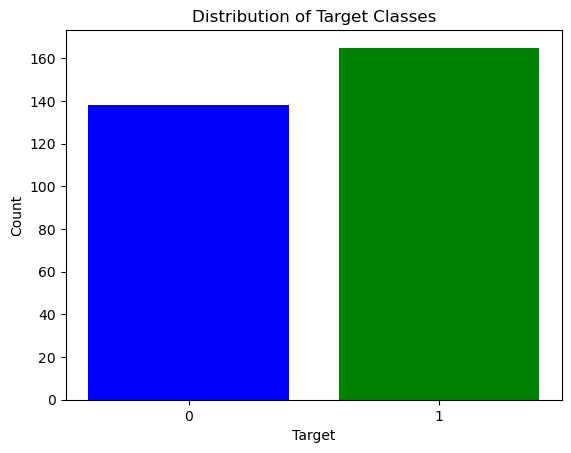

In [9]:
# Plot the distribution of the target classes
x1, x0 = y.value_counts() # count individual values and save them in corresponding variables.
plt.bar(['0', '1'], [x0, x1], color=['blue', 'green'])
plt.xlabel('Target') # giving label to x-axis
plt.ylabel('Count') # Giving label to y-axis
plt.title('Distribution of Target Classes') # Name of the plot
plt.show()


# 5. Training and Testing Split
We'll split the dataset into training and testing sets. The training set is used to build the model, while the testing set is used to evaluate its performance.

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 6. Model Training and Evaluation
We'll train various classification models and evaluate their performance.

### Naive Bayes
First, we'll train a Naive Bayes classifier and evaluate its accuracy.

In [17]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Naive Bayes model
model = BernoulliNB()
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"Naive Bayes Accuracy: {accuracy* 100:.4f}%")


Naive Bayes Accuracy: 85.2459%


### Support Vector Machine (SVM)
Next, we'll train a Support Vector Machine (SVM) classifier and evaluate its performance.

In [15]:
from sklearn import svm

# Initialize and train the SVM model
model = svm.SVC()
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"SVM Accuracy: {accuracy*100:.4f}%")


SVM Accuracy: 73.7705%


In [18]:
model

BernoulliNB()

# 7. Model Selection and Finalization
After comparing the models, we see that the Naive Bayes classifier performs the best. We'll save this model for future use.

In [19]:
import pickle

# Save the trained Naive Bayes model to a file
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))


# 8. Conclusion
In this notebook, we:

Loaded and cleaned the dataset.
Split the data into training and testing sets.
Trained and evaluated various classification models.
Selected the best-performing model and saved it for future use.
The Naive Bayes classifier achieved the highest accuracy and is therefore chosen as the final model.